In [82]:
import georef2
import numpy as np
import pyexiv2
import os
import matplotlib.pyplot as plt

In [83]:
# populate map
ORIGIN_PATH = "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143604_0001_D_Waypoint1.JPG"
FORWARD_DIR_PATH = "DJI_202508081433_021_PineIslandbog5H3m5x3photo/DJI_20250808143611_0002_D_Waypoint2.JPG"
IMG_DIR = "DJI_202508081433_021_PineIslandbog5H3m5x3photo"
LABEL_DIR = "output"
all_detections_coor = []

path_list = sorted(os.listdir("output"))
label_list = []
img_list = []

for i in range(len(path_list)): 
    if path_list[i][-3:] == 'txt':
        label_list.append(path_list[i])
    elif path_list[i][-3:] == 'JPG':
        img_list.append(path_list[i])
    else:
        pass

for i in range(len(label_list)):
    img_path = os.path.join(IMG_DIR, img_list[i])
    label_path = os.path.join(LABEL_DIR, label_list[i])
    mapped_list = georef2.georef(ORIGIN_PATH, FORWARD_DIR_PATH, img_path, label_path)
    all_detections_coor.extend(mapped_list)

img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311677 1.36469585]
e1 [-1.36469585  2.65311677]
img width:  5280.0
img height:  3956.0
e2 [2.65311

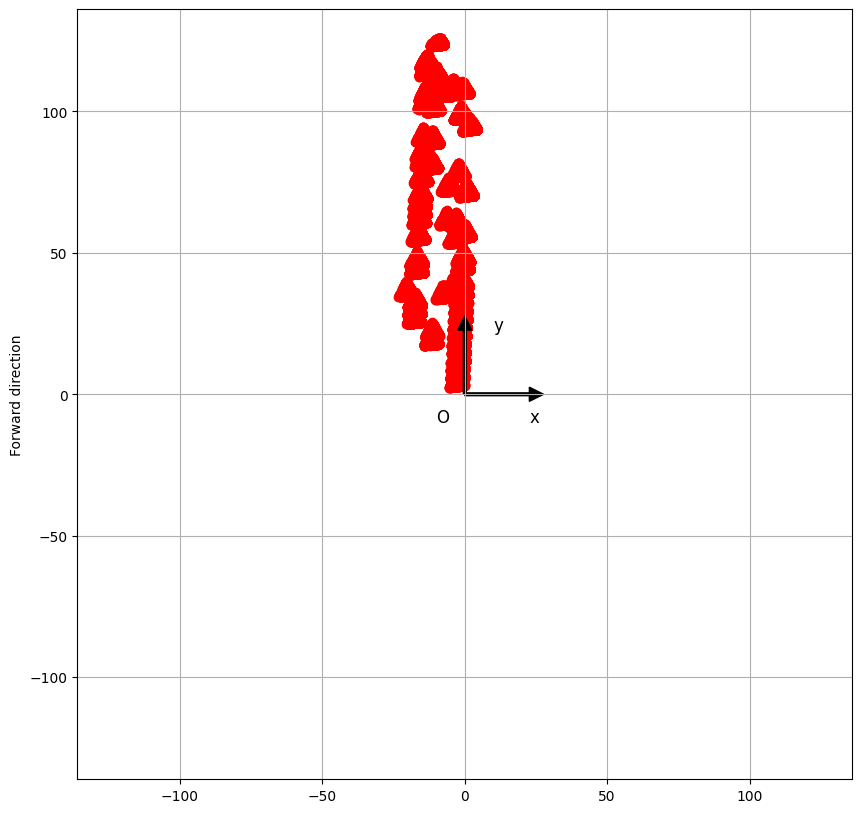

In [84]:
x_s = np.array([])
y_s = np.array([])

for i in range(len(all_detections_coor)):
    x_s = np.append(x_s, all_detections_coor[i][0])
    y_s = np.append(y_s, all_detections_coor[i][1])

# print('x_max:', np.max(x_s))
# print('x_min:', np.min(x_s))

# print('y_max:', np.max(y_s))
# print('y_min:', np.min(y_s))

if np.max(x_s) <= -1*np.min(x_s):
    x_bound = -1*np.min(x_s)
else:
    x_bound = np.max(x_s)
if np.max(y_s) <= -1*np.min(y_s):
    x_bound = -1*np.min(y_s)
else:
    y_bound = np.max(y_s)

if x_bound < y_bound:
    bound = y_bound
else:
    bound = x_bound

bound = bound + 10

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-bound, bound)
ax.set_ylim(-bound, bound)
plt.ylabel("Forward direction")
ax.grid(True)

ax.scatter(x_s, y_s, color='red', marker='o')

# y-axis
ax.arrow(0, 0, 0, bound/6, width=1, head_width=5, head_length=5, fc='black', ec='black')
plt.text(10, bound/6, "y", color='black', fontsize='12')

# x-axis
ax.arrow(0, 0, bound/6, 0, width= 1, head_width=5, head_length=5, fc='black', ec='black')
plt.text(bound/6, -10, "x", color='black', fontsize='12')

plt.text(-10, -10, "O", color='black', fontsize=12)
plt.show()